# __Data Blancing Using Oversampling, SMOTE, GAN, VAEs__

## __The summury of the work:__
- Performing Data Blancing Using Oversampling.
- Performing Data Blancing Using SMOTE.
- Performing Data Blancing Using .
- Performing Data Blancing Using VAEs.
- Save each generated dataset in a csv file for machine learning models.
- Tested the models on the generated datasets(Random Forest, XGBoosting, KNN).
- Visualizing the results for each balancing technique and each model.



## Load the cleaned dataset_

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
import warnings
warnings.filterwarnings('ignore')


In [4]:
darknet_data = pd.read_csv('./cleaned_data.csv')
darknet_data.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,traffic,application
0,10.152.152.11-216.58.220.99-57158-443-6,177772555,57158,3627736163,443,6,24/07/2015 04:09:48 PM,229,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,0,0
1,10.152.152.11-216.58.220.99-57159-443-6,177772555,57159,3627736163,443,6,24/07/2015 04:09:48 PM,407,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,0,0
2,10.152.152.11-216.58.220.99-57160-443-6,177772555,57160,3627736163,443,6,24/07/2015 04:09:48 PM,431,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,0,0
3,10.152.152.11-74.125.136.120-49134-443-6,177772555,49134,1249740920,443,6,24/07/2015 04:09:48 PM,359,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,0,0
4,10.152.152.11-173.194.65.127-34697-19305-6,177772555,34697,2915189119,19305,6,24/07/2015 04:09:45 PM,10778451,591,400,...,0,0,0,0,1.437760e+15,3117718.131,1.437760e+15,1.437760e+15,0,0


## what we are going to do:
### we chose the _Application Type_ as the target variable and we are going to balanced the data based on this variable. 

### Quick overview of the dataset

In [4]:
darknet_data.shape 

(117024, 85)

In [9]:
darknet_data.isnull().sum().sort_values(ascending=False)

Flow ID                 0
URG Flag Count          0
Fwd Packet/Bulk Avg     0
Fwd Bytes/Bulk Avg      0
Bwd Segment Size Avg    0
                       ..
Fwd IAT Mean            0
Fwd IAT Total           0
Flow IAT Min            0
Flow IAT Max            0
application             0
Length: 85, dtype: int64

In [6]:
darknet_data['application'].value_counts()

1    32714
5    24260
0    17947
2    11473
4    11173
6     9748
3     6143
7     3566
Name: application, dtype: int64

### as you can notice here the data is imbalanced, we'll some Oversmapling techniques.

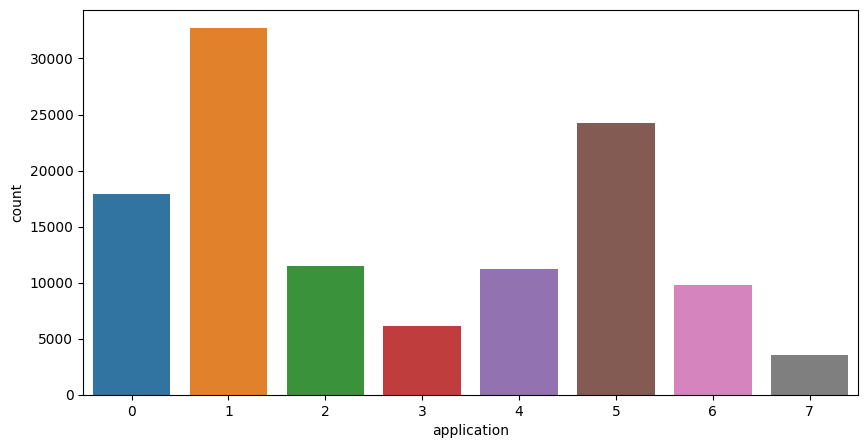

In [13]:
#plot the different values count in a plot 
plt.figure(figsize=(10,5))
sns.countplot(x='application', data=darknet_data)
plt.show()


## __SMOTE Technique__

## Diffrenet used strategies:

In [6]:
sampling_strategy_40k = {0: 40000, 
                        1: 40000, 
                        2: 40000,
                        3: 40000,
                        4: 40000,
                        5: 40000,
                        6: 40000,
                        7: 40000,}

sampling_strategy_50k = {0: 50000,
                         1: 50000,
                         2: 50000,
                         3: 50000,
                         4: 50000,
                         5: 50000,
                         6: 50000,
                         7: 50000, }

sampling_strategy_70k = {0: 70000,
                         1: 70000,
                         2: 70000,
                         3: 70000,
                         4: 70000,
                         5: 70000,
                         6: 70000,
                         7: 70000, }




In [5]:
darknet_data['application'].value_counts()

1    32714
5    24260
0    17947
2    11473
4    11173
6     9748
3     6143
7     3566
Name: application, dtype: int64

In [8]:
def perform_smote(X, y, sampling_strategy=None, random_state=42):
    """
    Generate synthetic data to balance a binary or multi-class classification problem using SMOTE.
    Returns:
    numpy.ndarray: Array of shape (num_samples_new, num_features) containing the generated data.
    numpy.ndarray: Array of shape (num_samples_new,) containing the corresponding labels.
    """

    # Apply SMOTE
    smote = SMOTE(sampling_strategy=sampling_strategy,
                  random_state=random_state)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    return X_resampled, y_resampled


X = darknet_data.drop(['application', 'Flow ID', 'Timestamp'], axis=1)
y = darknet_data['application']

# Perform SMOTE for 40k samples per class

X_resampled, y_resampled = perform_smote(
    X, y, sampling_strategy=sampling_strategy_40k, random_state=42)

darknet_data_smote_40k_per_class = pd.concat(
    [X_resampled, y_resampled], axis=1)


In [78]:
#Save the generated data to csv file 
darknet_data_smote_40k_per_class.to_csv('./darknet_data_smote_40k_per_class.csv', index=False)

In [80]:


X_resampled, y_resampled = perform_smote(
    X, y, sampling_strategy=sampling_strategy_50k, random_state=42)

darknet_data_smote_50k_per_class = pd.concat([X_resampled, y_resampled], axis=1)


In [83]:


X_resampled, y_resampled = perform_smote(
    X, y, sampling_strategy=sampling_strategy_70k, random_state=42)

darknet_data_smote_70k_per_class = pd.concat([X_resampled, y_resampled], axis=1)


### Let's begin with training the models on the generated dataset: 
### - _Random Forest_
### - _XGBoosting_
### - _KNN_
### - _Linear Discriminant Analysis_
### - _LightGBM_

In [218]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import lightgbm
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [206]:
DATA_GENERATED = [
    darknet_data_smote_40k_per_class, 
    darknet_data_smote_50k_per_class,
    darknet_data_smote_70k_per_class
]

classifiers = {
    'Random Forest': RandomForestClassifier(),
}

cols_to_drop = ['Flow ID', 'Timestamp']


In [103]:
X_train, X_test__, y_train, y_test__ = train_test_split(darknet_data.drop(['application', 'traffic', 'Flow ID', 'Timestamp'], axis=1), darknet_data['application'], test_size=0.2, random_state=42)

In [201]:



def train_test_model(dataset, model, target_variable, cols_to_delete_):
    """    
    Parameters:
    dataset (pandas.DataFrame): The dataset to be used for training and testing the model.
    model (sklearn estimator): The machine learning model to be trained and evaluated.
    target_variable (str): The name of the target variable column in the dataset.
    
    Returns:
    dict: A dictionary containing the evaluation metrics (accuracy, precision, recall, f1-score) on the test data.
    """

    # Split dataset into train and test sets
    X = dataset.drop(columns=[target_variable, 'traffic'])
    y = dataset[target_variable]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)

    # Train model on training data
    model.fit(X_train, y_train)

    # Predict on test data
    y_pred = model.predict(X_test__)

    # Calculate evaluation metrics on test data
    classification_report__ = classification_report(y_test__, y_pred)
    confusion_matrix__ = confusion_matrix(y_test__, y_pred)

    print(classification_report__)
    sns.heatmap(confusion_matrix__, annot=True, fmt='d')
    plt.show()

    



### _Test for the 40k generated dataset_

Training and evaluating Random Forest model...
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3586
           1       0.99      0.99      0.99      6578
           2       0.98      0.96      0.97      2210
           3       0.95      0.97      0.96      1209
           4       0.98      0.97      0.98      2268
           5       1.00      1.00      1.00      4904
           6       0.95      0.96      0.96      1963
           7       0.94      0.97      0.95       687

    accuracy                           0.98     23405
   macro avg       0.97      0.98      0.97     23405
weighted avg       0.98      0.98      0.98     23405



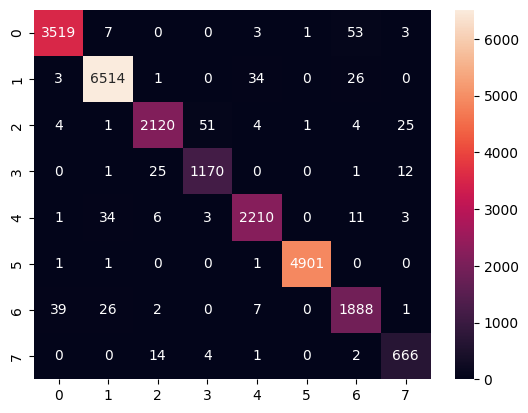

In [207]:
for model_name, model in classifiers.items():
    print(f'Training and evaluating {model_name} model...')
    train_test_model(darknet_data_smote_40k_per_class,
                     model, 'application', cols_to_drop)
    print('')


### _Test for the 50k generated dataset_

Training and evaluating Random Forest model...
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3586
           1       0.99      0.99      0.99      6578
           2       0.98      0.96      0.97      2210
           3       0.95      0.98      0.96      1209
           4       0.98      0.98      0.98      2268
           5       1.00      1.00      1.00      4904
           6       0.96      0.96      0.96      1963
           7       0.95      0.97      0.96       687

    accuracy                           0.98     23405
   macro avg       0.97      0.98      0.98     23405
weighted avg       0.98      0.98      0.98     23405



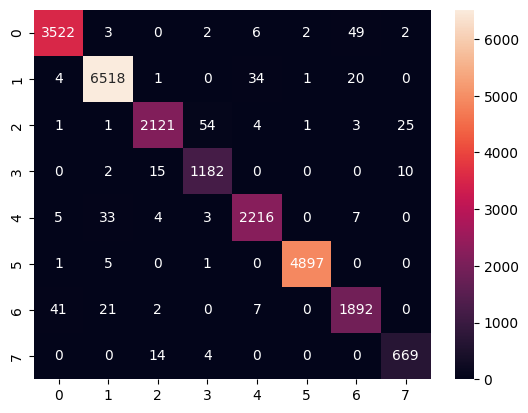

In [208]:
for model_name, model in classifiers.items():
    print(f'Training and evaluating {model_name} model...')
    train_test_model(darknet_data_smote_50k_per_class,
                     model, 'application', cols_to_drop)
    print('')


### _Test for the 70k generated dataset_

Training and evaluating Random Forest model...
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3586
           1       0.99      0.99      0.99      6578
           2       0.99      0.97      0.98      2210
           3       0.96      0.98      0.97      1209
           4       0.98      0.98      0.98      2268
           5       1.00      1.00      1.00      4904
           6       0.96      0.97      0.96      1963
           7       0.95      0.98      0.96       687

    accuracy                           0.99     23405
   macro avg       0.98      0.98      0.98     23405
weighted avg       0.99      0.99      0.99     23405



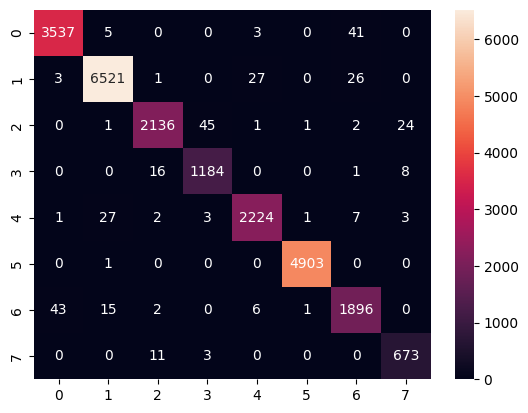

In [209]:
for model_name, model in classifiers.items():
    print(f'Training and evaluating {model_name} model...')
    train_test_model(darknet_data_smote_70k_per_class,
                     model, 'application', cols_to_drop)
    print('')


## __ADASYN Technique__

In [212]:
def perform_adasyn(X, y, sampling_strategy=None, random_state=42):
    """
    Returns: 
    numpy.ndarray: Array of shape (num_samples_new, num_features) containing the generated data.
    numpy.ndarray: Array of shape (num_samples_new,) containing the corresponding labels.
    """

    # Apply ADASYN
    adasyn = ADASYN(sampling_strategy=sampling_strategy,
                    random_state=random_state)
    X_resampled, y_resampled = adasyn.fit_resample(X, y)

    return X_resampled, y_resampled


X = darknet_data.drop(['application', 'Flow ID', 'Timestamp'], axis=1)
y = darknet_data['application']



X_resampled, y_resampled = perform_adasyn(
    X, y, sampling_strategy=sampling_strategy_40k, random_state=42)

darknet_data_adasyn_40k_per_class = pd.concat(
    [X_resampled, y_resampled], axis=1)


In [213]:
X_resampled, y_resampled = perform_adasyn(
    X, y, sampling_strategy=sampling_strategy_50k, random_state=42)

darknet_data_adasyn_50k_per_class = pd.concat(
    [X_resampled, y_resampled], axis=1)


In [214]:
X_resampled, y_resampled = perform_adasyn(
    X, y, sampling_strategy=sampling_strategy_70k, random_state=42)

darknet_data_adasyn_70k_per_class = pd.concat(
    [X_resampled, y_resampled], axis=1)



## let's begin with training the models on the generated dataset:

### _Test for the 40k generated dataset_

Training and evaluating Random Forest model...
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3586
           1       0.99      0.99      0.99      6578
           2       0.99      0.96      0.97      2210
           3       0.95      0.97      0.96      1209
           4       0.98      0.98      0.98      2268
           5       1.00      1.00      1.00      4904
           6       0.96      0.96      0.96      1963
           7       0.93      0.97      0.95       687

    accuracy                           0.98     23405
   macro avg       0.97      0.98      0.97     23405
weighted avg       0.98      0.98      0.98     23405



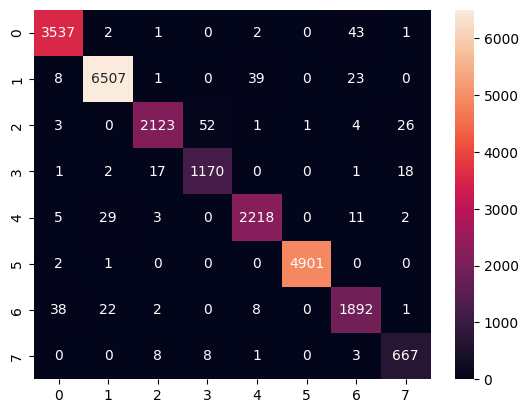

In [228]:
for model_name, model in classifiers.items():
    print(f'Training and evaluating {model_name} model...')
    train_test_model(darknet_data_adasyn_40k_per_class,
                     model, 'application', cols_to_drop)
    print('')


### _Test for the 50k generated dataset_

Training and evaluating Random Forest model...
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3586
           1       0.99      0.99      0.99      6578
           2       0.99      0.96      0.97      2210
           3       0.95      0.98      0.97      1209
           4       0.98      0.98      0.98      2268
           5       1.00      1.00      1.00      4904
           6       0.96      0.96      0.96      1963
           7       0.94      0.98      0.96       687

    accuracy                           0.98     23405
   macro avg       0.97      0.98      0.98     23405
weighted avg       0.98      0.98      0.98     23405



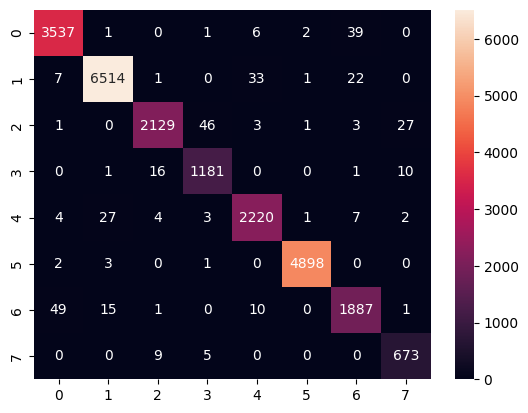

In [216]:
for model_name, model in classifiers.items():
    print(f'Training and evaluating {model_name} model...')
    train_test_model(darknet_data_adasyn_50k_per_class,
                     model, 'application', cols_to_drop)
    print('')


### _Test for the 70k generated dataset_

Training and evaluating Random Forest model...
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3586
           1       0.99      0.99      0.99      6578
           2       0.98      0.97      0.97      2210
           3       0.96      0.98      0.97      1209
           4       0.98      0.98      0.98      2268
           5       1.00      1.00      1.00      4904
           6       0.97      0.97      0.97      1963
           7       0.95      0.97      0.96       687

    accuracy                           0.99     23405
   macro avg       0.98      0.98      0.98     23405
weighted avg       0.99      0.99      0.99     23405



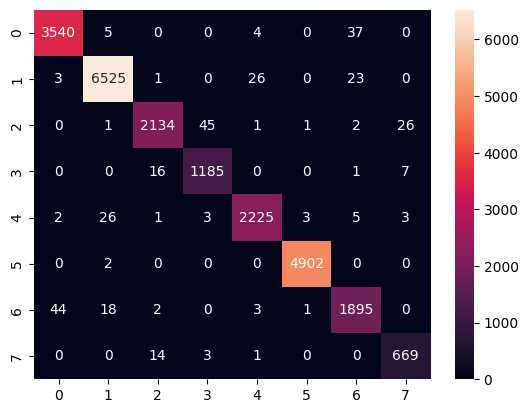

In [229]:
for model_name, model in classifiers.items():
    print(f'Training and evaluating {model_name} model...')
    train_test_model(darknet_data_smote_70k_per_class,
                     model, 'application', cols_to_drop)
    print('')


## __SMOTE-ENN Technique__

In [222]:
def perform_smote_enn(X, y, sampling_strategy=None, random_state=42):
    """
    Generate synthetic data to balance a binary or multi-class classification problem using SMOTE-ENN.
    Returns:
    numpy.ndarray: Array of shape (num_samples_new, num_features) containing the generated data.
    numpy.ndarray: Array of shape (num_samples_new,) containing the corresponding labels.
    """

    # Apply SMOTE-ENN
    smote_enn = SMOTEENN(sampling_strategy=sampling_strategy,
                         random_state=random_state)
    X_resampled, y_resampled = smote_enn.fit_resample(X, y)

    return X_resampled, y_resampled


X = darknet_data.drop(['application', 'Flow ID', 'Timestamp'], axis=1)
y = darknet_data['application']


X_resampled, y_resampled = perform_smote_enn(
    X, y, sampling_strategy=sampling_strategy_40k)

darknet_data_smote_enn_40k_per_class = pd.concat(
    [X_resampled, y_resampled], axis=1)


In [223]:
X_resampled, y_resampled = perform_smote_enn(
    X, y, sampling_strategy=sampling_strategy_50k)

darknet_data_smote_enn_50k_per_class = pd.concat(
    [X_resampled, y_resampled], axis=1)

In [224]:
X_resampled, y_resampled = perform_smote_enn(
    X, y, sampling_strategy=sampling_strategy_70k)

darknet_data_smote_enn_70k_per_class = pd.concat(
    [X_resampled, y_resampled], axis=1)

## Test for the 40k generated dataset: 

Training and evaluating Random Forest model...
              precision    recall  f1-score   support

           0       0.96      0.91      0.93      3586
           1       0.97      0.97      0.97      6578
           2       0.94      0.79      0.86      2210
           3       0.77      0.92      0.84      1209
           4       0.92      0.91      0.91      2268
           5       0.99      1.00      1.00      4904
           6       0.81      0.89      0.85      1963
           7       0.77      0.92      0.84       687

    accuracy                           0.93     23405
   macro avg       0.89      0.91      0.90     23405
weighted avg       0.94      0.93      0.93     23405



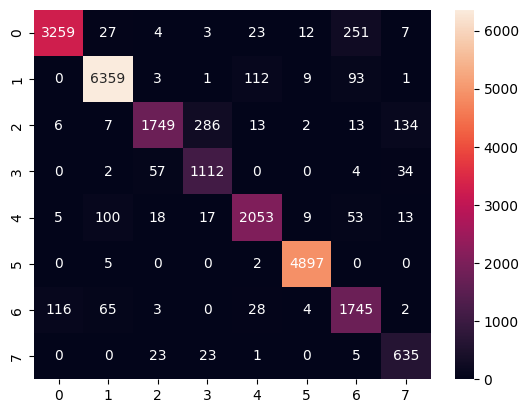

In [225]:
for model_name, model in classifiers.items():
    print(f'Training and evaluating {model_name} model...')
    train_test_model(darknet_data_smote_enn_40k_per_class,
                     model, 'application', cols_to_drop)

## Test for the 50k generated dataset:

Training and evaluating Random Forest model...
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      3586
           1       0.97      0.97      0.97      6578
           2       0.94      0.82      0.87      2210
           3       0.80      0.92      0.86      1209
           4       0.92      0.92      0.92      2268
           5       0.99      1.00      1.00      4904
           6       0.82      0.90      0.86      1963
           7       0.78      0.92      0.84       687

    accuracy                           0.94     23405
   macro avg       0.90      0.92      0.91     23405
weighted avg       0.94      0.94      0.94     23405



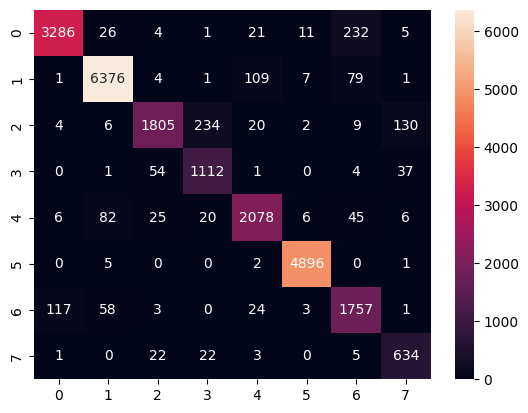

In [226]:
for model_name, model in classifiers.items():
    print(f'Training and evaluating {model_name} model...')
    train_test_model(darknet_data_smote_enn_50k_per_class,
                     model, 'application', cols_to_drop)


## Test for the 70k generated dataset:

Training and evaluating Random Forest model...
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      3586
           1       0.98      0.97      0.97      6578
           2       0.95      0.83      0.88      2210
           3       0.80      0.92      0.86      1209
           4       0.93      0.93      0.93      2268
           5       1.00      1.00      1.00      4904
           6       0.85      0.91      0.88      1963
           7       0.79      0.94      0.86       687

    accuracy                           0.94     23405
   macro avg       0.91      0.93      0.92     23405
weighted avg       0.95      0.94      0.94     23405



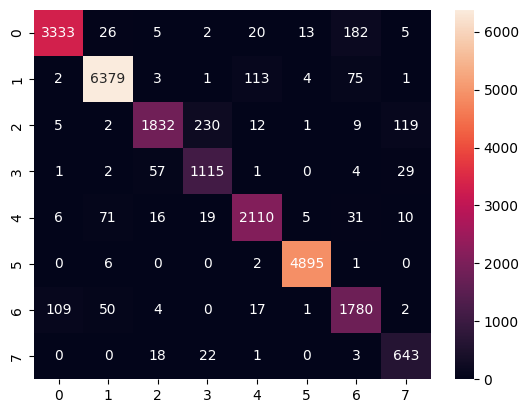

In [227]:
for model_name, model in classifiers.items():
    print(f'Training and evaluating {model_name} model...')
    train_test_model(darknet_data_smote_enn_70k_per_class,
                     model, 'application', cols_to_drop)


## __Conclusion__

### __Based on the experiments we conducted on the dataset, we have found that both the SMOTE and ADASYN techniques are effective in generating balanced datasets for machine learning models. However, we have decided to use the SMOTE technique over ADASYN for this particular dataset because it performed better on other models such as XGBoost when we used a 40k strategy__.

### __Additionally, we also evaluated the SMOTE-ENN technique which is known for its ability to reduce noise in the dataset near the boundaries. While it did perform well, it was not as effective as the SMOTE technique. Therefore, we have selected the darknet_data_smote_enn_50k_per_class as our final generated dat .__

### __The Random Forest was the best model for this dataset , for the other algorithms(Xgboosting, KNN, LDA, LightGBM) we are going to try them later.__

### __We plan to explore the potential of GANs and VAEs in our project, but we have decided to prioritize other techniques at the moment. Therefore, we will try GANs and VAEs at a later stage.__